In [ ]:
#Import packages

!pip install river
import pandas as pd
import numpy as np
from river import drift
from river import stream
import pandas as pd
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from matplotlib import gridspec
import datetime as dt
ddm = drift.DDM()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.8 MB/s 


In [ ]:
#define plotting function
def plot_data(data_stream2, drifts=None):
    fig = plt.figure(figsize=(10,4), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(data_stream2, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(data_stream2, label=r'$data_stream2$')


    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red', linestyle='dashed')
    plt.show()

In [ ]:
#read montly error file for London's boroughs
data_holdout_error = pd.read_csv("/content/sample_data/boroughs_monthly_error.csv")
(data_holdout_error)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.314,0.341,0.286,0.332,0.341,0.344,0.300,0.314,0.347,0.298,...,0.333,0.300,0.327,0.335,0.339,0.382,0.328,0.295,0.359,0.35
1,0.286,0.305,0.302,0.313,0.272,0.316,0.259,0.288,0.320,0.277,...,0.295,0.282,0.304,0.326,0.293,0.348,0.313,0.298,0.330,0.34
2,0.261,0.327,0.291,0.306,0.302,0.327,0.284,0.293,0.300,0.292,...,0.283,0.265,0.325,0.281,0.320,0.359,0.318,0.295,0.381,0.33
3,0.254,0.342,0.296,0.301,0.315,0.298,0.269,0.271,0.287,0.255,...,0.309,0.242,0.329,0.307,0.283,0.315,0.279,0.240,0.371,0.35
4,0.244,0.338,0.306,0.313,0.284,0.308,0.277,0.290,0.309,0.279,...,0.308,0.252,0.331,0.292,0.288,0.330,0.278,0.268,0.369,0.35
5,0.227,0.322,0.295,0.279,0.278,0.278,0.247,0.265,0.278,0.261,...,0.290,0.217,0.302,0.283,0.260,0.340,0.254,0.232,0.376,0.32
6,0.247,0.329,0.294,0.288,0.283,0.295,0.253,0.268,0.291,0.268,...,0.292,0.239,0.313,0.300,0.277,0.338,0.267,0.246,0.365,0.34
7,0.241,0.313,0.308,0.300,0.293,0.302,0.274,0.275,0.300,0.281,...,0.302,0.249,0.312,0.315,0.270,0.332,0.278,0.250,0.369,0.32
8,0.233,0.352,0.317,0.306,0.286,0.313,0.279,0.285,0.310,0.274,...,0.320,0.246,0.341,0.291,0.289,0.368,0.282,0.260,0.387,0.34
9,0.272,0.347,0.300,0.313,0.306,0.327,0.284,0.293,0.334,0.279,...,0.326,0.255,0.336,0.329,0.299,0.355,0.297,0.278,0.389,0.36


Change detected at index 1857, input value: 0.454
Change detected at index 12076, input value: 0.451
Change detected at index 13675, input value: 0.448
Change detected at index 28025, input value: 0.445
Change detected at index 33618, input value: 0.436
Change detected at index 40834, input value: 0.446


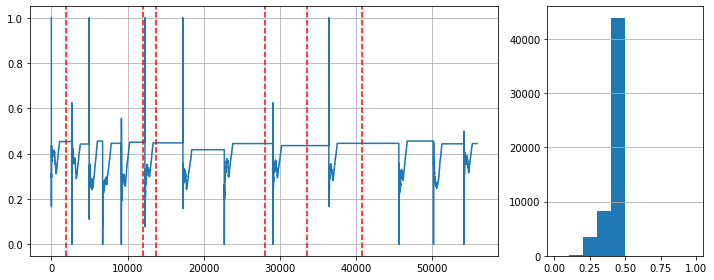

         covid_dt   patid borough  y  yhat  cut_date  false_classification  \
1857   2020-04-22   57569   Brent  0     0         5                     0   
12076  2020-08-29  246564   Brent  0     1         9                     1   
13675  2020-09-10  274924   Brent  0     0        10                     0   
28025  2020-11-25  550661   Brent  0     0        12                     0   
33618  2020-12-22  655703   Brent  0     0        13                     0   
40834  2021-01-13  792117   Brent  0     0        14                     0   

       vector  
1857    0.454  
12076   0.451  
13675   0.448  
28025   0.445  
33618   0.436  
40834   0.446  
[Timestamp('2020-04-01 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2021-01-01 00:00:00')]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


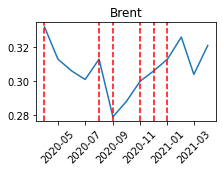

In [ ]:
#transform it to pandas data drame
df = pd.DataFrame(data_holdout_error)
num =3


#extract the error for each borough
error = df[df.columns[num]]
(error)
col_name = df.columns[num]
col_name

#read the prequential error file for each borough
data_preq_error = pd.read_csv("/content/sample_data/preq_error "+ col_name+" .csv")



data_stream_preq_error = data_preq_error['vector']
#initiate the drift detection parameters
ddm = drift.DDM()

#define a list to hols the points where the drift is detected
drifts = []

#loop through each example (ordered error) and reset the parameters when a drift is detected 
for  i,val in enumerate(data_stream_normal_error ):
     in_drift, in_warning = ddm.update(val)
    # print(in_drift)
     if in_drift:
         print(f"Change detected at index {i}, input value: {val}")
         ddm.reset()
         drifts.append(i)
         ddm.reset()
     #if in_warning:
      #print(f"Early drift detected at index {i}, input value: {val}")
      
#plot the error for the examples and detected drifts      
plot_data(data_stream_preq_error, drifts)

#extract the index when the drift is detected 
new_drifts = data_normal_error.iloc[drifts]
print(new_drifts)

#extract the dates for the detected indeces
from pandas.tseries.offsets import MonthBegin
new_drifts['covid_dt'] = pd.to_datetime(new_drifts['covid_dt']) - MonthBegin(1)
dates = new_drifts['covid_dt']
dates = dates.tolist()
print(dates)

#define plotting function
def plot_data2(data_stream2, ):
  #set the x-axis
    date_time = ['Apr 2020', 'May 2020',
             'Jun 2020', 'Jul 2020',
             'Aug 2020', 'Sept 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020',
             'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021']

    date_time = pd.to_datetime(date_time)
    DF = pd.DataFrame()
    DF['value'] = data_stream2
    DF = DF.set_index(date_time)
    
    #set the figure dimension and labels
    fig = plt.figure(figsize=(3.2,2.5), tight_layout=True)
    plt.plot(DF)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col_name)
   # plt.gca().axes.get_xaxis().set_visible(False)

    #red lines for detected drifts
    for date in dates:
            plt.axvline(date, color='red', linestyle='dashed')
 
    plt.xticks(rotation = 45)
   # plt.savefig('/content/gdrive/MyDrive/tesis/imagenes/50prc_trabajo.png',bbox_inches='tight')

    plt.show()
 
#files.download("/content/gdrive/MyDrive/tesis/imagenes/50prc_trabajo.png")
 
  
plot_data2(error)